# Universidad Nacional Autónoma de México
## Facultad de Ingeniería

# Realizado por:
- José Ángel Olmedo Guevara

Recuperado de:  [Datasets Kaggle](https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset)



Problema a resolver:

Mediante algoritmos machine learning implementar un modelo capaz de predecir si te dará un derrame cerebral con base en ciertas características.

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 10.4 MB/s eta 0:00:00


In [ ]:
# Importar bibliotecas para el análisis de datos
import pandas as pd # Para manejo del dataset
import seaborn as sns # Ayuda a la visualización de datos en matplotlib
import numpy as np # Para manejo de números y matrices
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score # Entrenar el modelo
from sklearn.linear_model import LinearRegression, LogisticRegression # Para el modelo de regreción lineal
from sklearn.preprocessing import LabelEncoder, RobustScaler # Codifica variables, permite manejo de variables de cadena (los pasa
                                                             # a variables númericas) y RobustEscaler normaliza
                                                             # los datos en los límites para los modelos.

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from sklearn import linear_model #Para el modelo de regresión lineal
from sklearn.metrics import mean_squared_error, r2_score #Para el análisis de datos, cuando obtengamos la eficiencia del modelo
import matplotlib.pyplot as plt #Manejo de gráficas


In [ ]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv') #Cargamos el dataset
df.head() #Lo imprimimos


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
df.drop('id',axis=1,inplace=True) #Borramos el ID ya que no aportará al modelo

In [ ]:
df.info() # Nos brinda información sobre el dataset como tipos de datos, número de columnas, features, etcétera
print(f"\nTamaño del dataframe (filas X columnas): ", {df.shape}) #Imprimimos la dimensión del dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB

Tamaño del dataframe (filas X columnas):  {(5110, 11)}


In [ ]:
df.age=df.age.astype('int64') #convertimos la edad a entero
df.describe() #Obtenemos las características principales (media, desviación estandar, percentiles,
#valores máximos y mínimos de nuestro nuevo dataset)
#converting age to int

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.215264,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.633866,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
print("Valores duplicados: ", df.duplicated().sum()) #Verificamos si hay valores duplicados en el dataframe

Valores duplicados:  0


In [ ]:
print("Valores faltantes en cada columna:\n")
print(df.isnull().sum()) #Verificamos si hay valores faltantes en alguna columna

Valores faltantes en cada columna:

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
df['bmi'].fillna(df['bmi'].mean(),inplace=True) #Rellenamos los valores faltantes con el valor promedio de esa característica
print(df.isnull().sum()) #Verificamos que no haya valores faltantes en alguna columna
print("\nYa no hay valores faltantes en ninguna columna :D")

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Ya no hay valores faltantes en ninguna columna :D


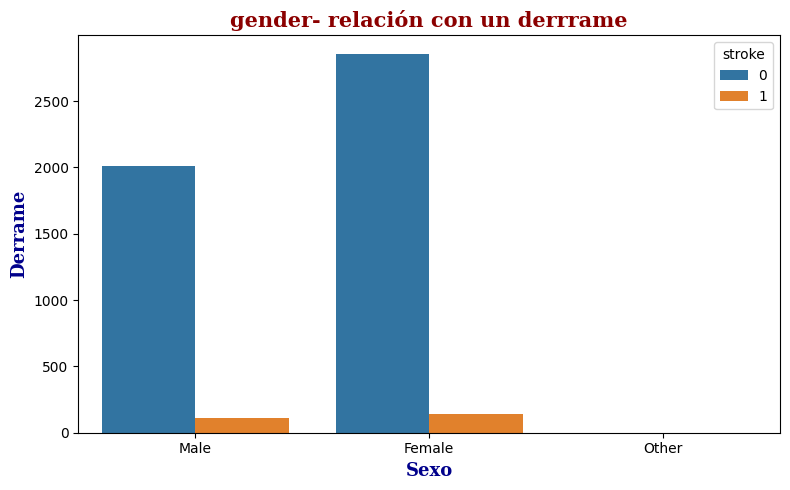

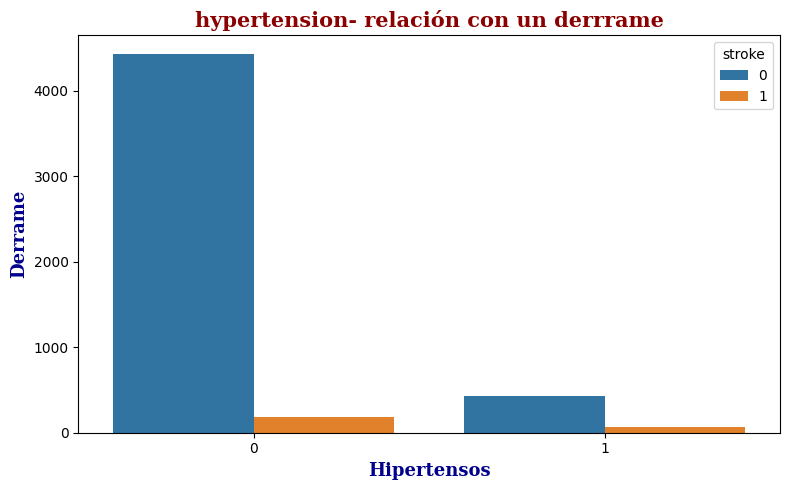

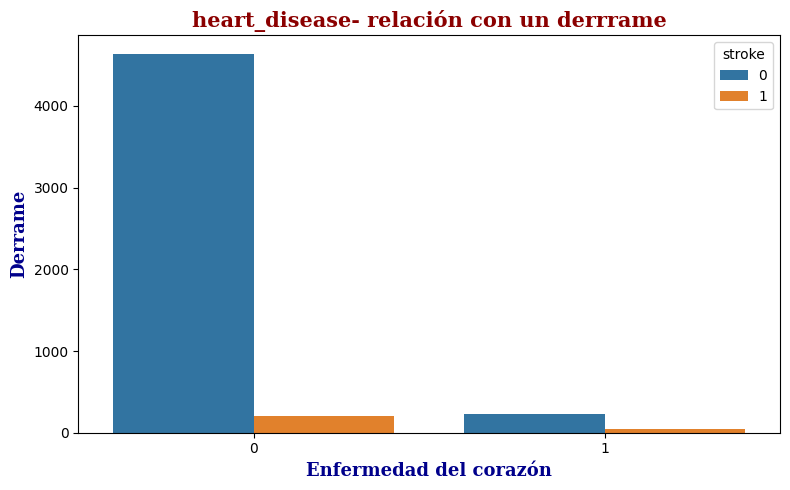

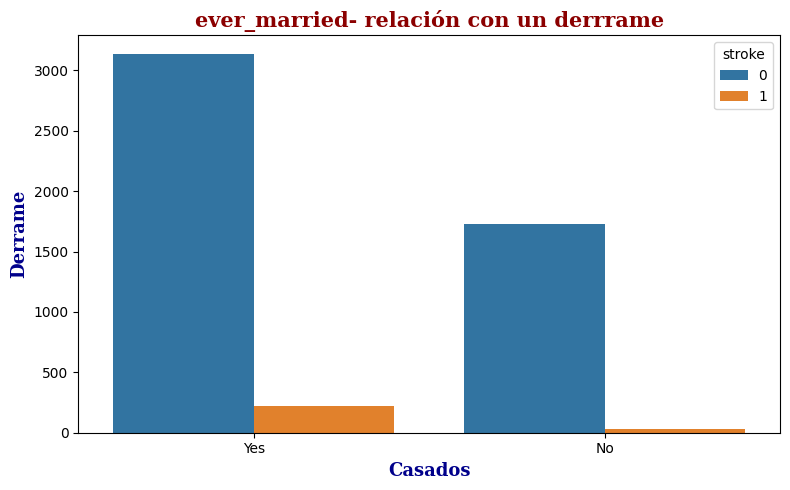

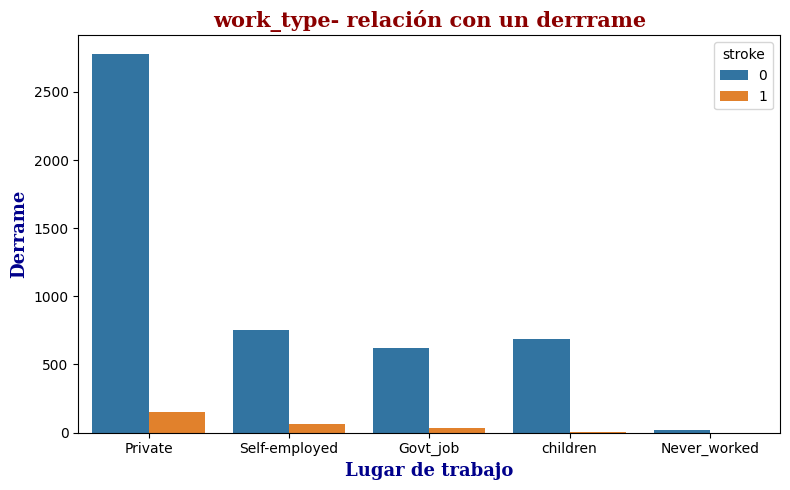

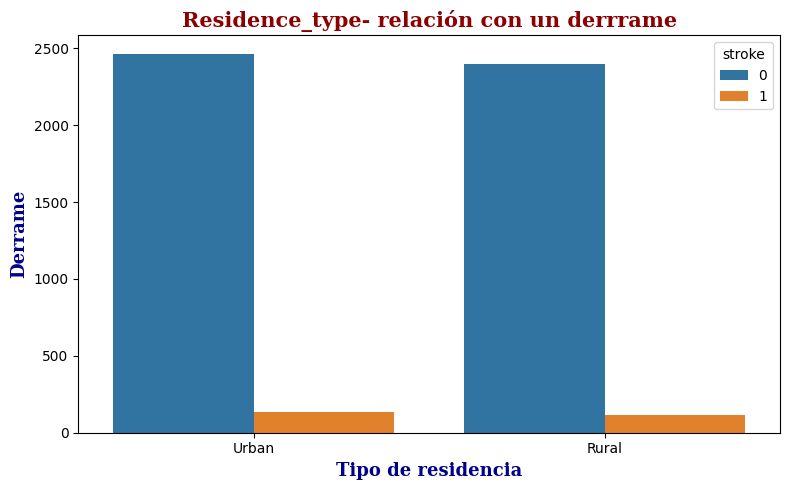

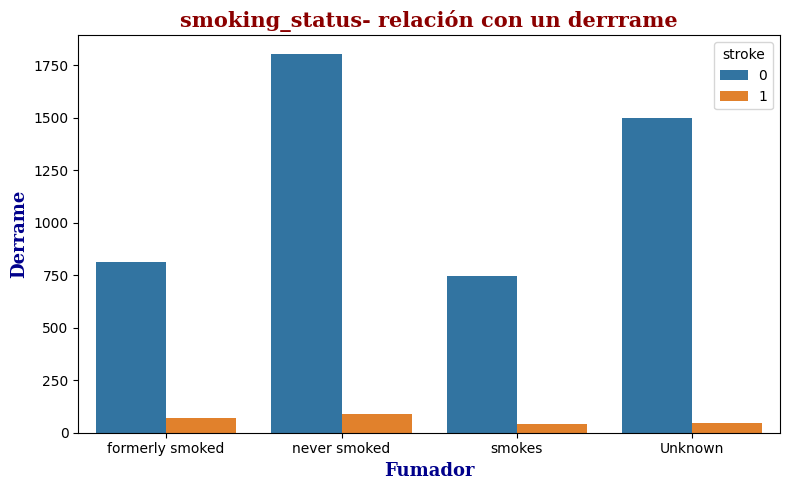

In [ ]:
'''Este código imprimira la relación de cada una de las variables con tener un derrame cerebral'''

#Creamos una lista con las columnas categoricas
columnas_categoricas=['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type','Residence_type', 'smoking_status', 'stroke']
columnas_numericas=['age', 'avg_glucose_level', 'bmi']
eje_categorico= ['Sexo', 'Hipertensos','Enfermedad del corazón', 'Casados', 'Lugar de trabajo', 'Tipo de residencia', 'Fumador']
title_font={'family': 'serif', 'color': 'darkred', 'weight': 'bold', 'size': 15}
axis_font={'family': 'serif', 'color': 'darkblue', 'weight': 'bold', 'size': 13}

for i, z in list(zip(columnas_categoricas, eje_categorico)):
    plt.figure(figsize=(8,5))
    sns.countplot( x=i, data=df[columnas_categoricas], hue='stroke')

    plt.title(i+ '- relación con un derrrame',fontdict=title_font)
    plt.xlabel(z,fontdict=axis_font)
    plt.ylabel('Derrame',fontdict=axis_font)

    plt.tight_layout()
    plt.show()

In [ ]:
valores=[] #Declaramos una lista vacía para almacenar el número de valores únicos que hay por característica.
for i in df.columns: #Ciclo para recorrer cada elemento de la columna
    x=df[i].value_counts().count() #Cuenta la frecuencia de cada elemento en cada columna
    valores.append(x) #Los agrega a la lista vacía
pd.DataFrame(valores,index=df.columns,columns=["Valores únicos"]) #Imprimimos el dataframe con los valores repetidos.

,Valores únicos
gender,3
age,83
hypertension,2
heart_disease,2
ever_married,2
work_type,5
Residence_type,2
avg_glucose_level,3979
bmi,419
smoking_status,4


In [ ]:
'''Utilizaremos LabelEncoder() para convertir las características no numéricas a un tipo de dato int64(entero) '''

LE = LabelEncoder() #Creamos instancia de LabelEncoder
df['gender'] = LE.fit_transform(df['gender']) #Reemplazamos los valores de la columna 'gender' 1 serán H y 0 M.
df['ever_married'] = LE.fit_transform(df['ever_married']) #Reemplazamos los valores de la columna 'ever_married', 1 Yes 0 No.
df['Residence_type'] = LE.fit_transform(df['Residence_type']) #Reemplazamos los valores de la columna 'residence_type', 1 Urban 0 Rural.
df.head() #Mostramos cambios

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


In [ ]:
df_copy=df.copy() #Realizamos una copia del dataframe para mantener los datos originales
df_copy.head() #Imprimimos el dataframe

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,0,61,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,1,80,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,0,49,0,0,1,Private,1,171.23,34.400000,smokes,1
4,0,79,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


Utilizaremos One Hot Encoder:

Cuando trabajamos con algoritmos de aprendizaje automático, muchos de ellos requieren que las variables de entrada sean numéricas. Sin embargo, algunas características pueden ser categóricas, como colores, tipos de vehículos, o países. El One-Hot Encoder aborda este problema al convertir cada categoría en una nueva columna binaria y asignando un 1 o 0 (binario) a indicar la presencia o ausencia de la categoría en cada observación.

In [ ]:
#Creamos una lista con las columnas que no tienen datos enteros
caracteristicas_que_queremos_pasar_a_entero=['work_type', 'smoking_status']
#Aplicamos One Hot Encoder a columnas que tienen más de 2 datos diferentes.
df_copy = pd.get_dummies(df_copy, columns=caracteristicas_que_queremos_pasar_a_entero, drop_first=True).astype('int64')
df_copy.head() #Imprimimos resultado

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,67,0,1,1,1,228,36,1,0,1,0,0,1,0,0
1,0,61,0,0,1,0,202,28,1,0,0,1,0,0,1,0
2,1,80,0,1,1,0,105,32,1,0,1,0,0,0,1,0
3,0,49,0,0,1,1,171,34,1,0,1,0,0,0,0,1
4,0,79,1,0,1,0,174,24,1,0,0,1,0,0,1,0


Aplicaremos Robust Scaler:

Normalizaremos los datos para poder ajustar los datos en los extremos para no afectar a los modelos de Machine Learning y estén en la misma escala. El Robust Scaler utiliza la mediana y el rango intercuartílico (IQR) para llevar a cabo esta normalización. El IQR es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1), lo que proporciona una medida robusta de la dispersión que no se ve afectada por valores extremos.

In [ ]:
lista_de_caracteristicas_a_escalar = ['age', 'bmi', 'avg_glucose_level'] #Creammos una lista vacía de las características que queremos escalar
robust_scaler = RobustScaler() #Creamos una instancia de RobustScaler()
df_copy[lista_de_caracteristicas_a_escalar ] = robust_scaler.fit_transform(df_copy[lista_de_caracteristicas_a_escalar ]) #Generamos la escala
#                                                                                                                       y actualizamos el dataframe
df_copy.head() #Mostramos valores

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0.611111,0,1,1,1,3.702703,0.888889,1,0,1,0,0,1,0,0
1,0,0.444444,0,0,1,0,3.000000,0.000000,1,0,0,1,0,0,1,0
2,1,0.972222,0,1,1,0,0.378378,0.444444,1,0,1,0,0,0,1,0
3,0,0.111111,0,0,1,1,2.162162,0.666667,1,0,1,0,0,0,0,1
4,0,0.944444,1,0,1,0,2.243243,-0.444444,1,0,0,1,0,0,1,0


In [ ]:
df_copy.count() #Verificamos que no haya valores nulos

gender                            5110
age                               5110
hypertension                      5110
heart_disease                     5110
ever_married                      5110
Residence_type                    5110
avg_glucose_level                 5110
bmi                               5110
stroke                            5110
work_type_Never_worked            5110
work_type_Private                 5110
work_type_Self-employed           5110
work_type_children                5110
smoking_status_formerly smoked    5110
smoking_status_never smoked       5110
smoking_status_smokes             5110
dtype: int64

La correlación es que tan relacionadas están las variables ente sí
1: Totalmente relacionadas
-1: Ninguna relación

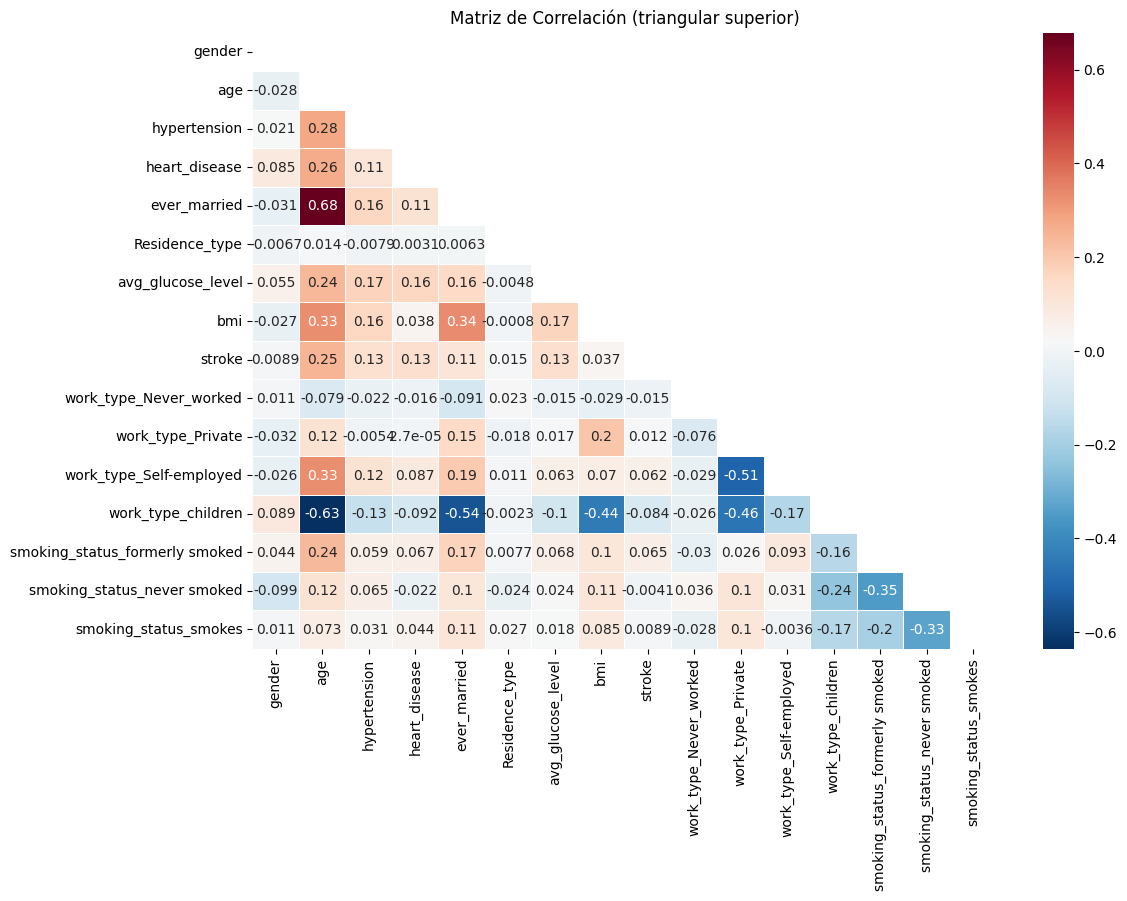

In [ ]:
# Visualización de la correlación entre las variables
matriz_de_correlacion_triangular_superior= np.triu(df_copy.corr()) #Obtenemos la matriz de correlación triangular superior
plt.figure(figsize=(12, 8)) #Figura de 12 x 8
sns.heatmap(df_copy.corr(), annot=True, cmap='RdBu_r', linewidths=0.5, mask=matriz_de_correlacion_triangular_superior)
#Características para el mapa de calor, como el color, etc...)
plt.title('Matriz de Correlación (triangular superior)')
plt.show()

Ahora entrenaremos los modelos:

In [ ]:
X=df_copy.drop(['stroke'], axis=1) #Seleccionamos para la variable dependiente todas las características menos el derrame
y=df_copy['stroke'] #Seleccionamos para la variable independiente unicamente la columna de derrame

#El 80% de los datos serán utilizados para entrenar el modelo
#El 20% de los datos serán utilizados para probar el modelo
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

X_test.shape , X_train.shape  #Mostramos vectores de entrenamiento y testeo

((1022, 15), (4088, 15))

In [ ]:
# Creamos un diccionario con todos los modelos de machine learning que utilizaremos para iterarlos más adelante
modelos = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "SVC": SVC(),
    "LGBM": LGBMClassifier(),
    "XGBOOST": XGBClassifier(),
    "CatBoost": CatBoostClassifier(),
    "NaiveBayes": GaussianNB()}

#Creamos una función para poder entrenar los datos con cada modelo de ML que definimos previamente
def ajustar_y_entrenar(modelos, X_train, X_test, y_train, y_test):
    """
    Las predicciones se realizaran con los modelos de Machine Learning
    X_train: datos de entrenamiento
    X_test: datos de prueba
    y_train: resultados de entrenamiento
    y_test: resultados de prueba
    """
    #Generamos una semilla para aleatorizar.
    np.random.seed(42)
    #Creamos un nuevo diccionario para almacenar el puntaje de efectividad (score) de los modelos de ML
    score_modelos={}
    #Iteramos para cada clave y valor de nuestro diccionario
    for clave,valor in modelos.items():
        #Ajustamos el valor que estamos iterando al modelo
        valor.fit(X_train,y_train)
        #Obtenemos el score
        score_modelos[clave]=valor.score(X_test, y_test)
    return score_modelos #Devolvemos el diccionario de scores

In [ ]:
score_modelos=ajustar_y_entrenar(modelos=modelos, X_train = X_train, X_test = X_test, y_train = y_train, y_test = y_test)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 187, number of negative: 3901
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000667 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 346
[LightGBM] [Info] Number of data points in the train set: 4088, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.045744 -> initscore=-3.037880
[LightGBM] [Info] Start training from score -3.037880
Learning rate set to 0.018795
0:	learn: 0.6657417	total: 49.1ms	remaining: 49s
1:	learn: 0.6338893	total: 52.3ms	remaining: 26.1s
2:	learn: 0.6067347	total: 56.7ms	remaining: 18.9s
3:	learn: 0.5770066	total: 60.9ms	remaining: 15.2s
4:	learn: 0.5522260	total: 63ms	remaining: 12.5s
5:	learn: 0.5265016	total: 67.3ms	remaining: 11.1s
6:	learn: 0.5064325	total: 72.3ms	r

In [ ]:
#Generamos un nuevo dataframe para poder mostrar los scores de manera más ordenada
scores=pd.DataFrame({'scores': score_modelos}).sort_values('scores', ascending=False)
scores #Imprimimos el dataframe creado

,scores
Random Forest,0.940313
Logistic Regression,0.939335
SVC,0.939335
CatBoost,0.936399
LGBM,0.936399
KNN,0.934442
XGBOOST,0.932485
Decision Tree,0.901174
NaiveBayes,0.371820


In [ ]:
#Probamos el modelo con un nuevo pronóstico:
paciente=pd.DataFrame({'gender': [0], 'age': [0.34444], 'hypertension': [0], 'heart_disease': [0], 'ever_married': [1], 'Residence_type': [1],
                       'avg_glucose_level': [2.62454], 'bmi': [0.2419], 'work_type_Never_worked': [0],
                       'work_type_Private': [1], 'work_type_Self-employed': [0], 'work_type_children': [0],
                       'smoking_status_formerly smoked': [0], 'smoking_status_never smoked': [1], 'smoking_status_smokes': [0]})
predicciones={}
for clave,valor in modelos.items():
  predicciones[clave]=valor.predict(paciente.iloc[[0]]) #Realizamos la predicción de cada modelo
predicciones #Devolvemos el diccionario de predicciones


{'Logistic Regression': array([0]),
 'KNN': array([0]),
 'Random Forest': array([0]),
 'Decision Tree': array([0]),
 'SVC': array([0]),
 'LGBM': array([0]),
 'XGBOOST': array([0]),
 'CatBoost': array([0]),
 'NaiveBayes': array([1])}